# Bag-of-words (BoW)

Bag-of-words (BoW) is a statistical language model based on **word count** ( = how many times each word appears in a document)

* **Statistical language model** :   
is a way for computers to make sense of language based on probability. 
  *     **unigram model**: n-gram model, with n = 1 (the number of words in a sequence)


* **Feature extraction** or **Vectorization**:  
for a word present in a document; we want to know how many times it occurred


> ex:  
-*Features Dictionnary*:  
{'**five**': 0,  
'fantastic': 1,  
'**fish**': 2,  
'fly': 3,  
'off': 4,  
'to': 5,  
'**find**': 6,  
'**faraway**': 7,  
'function': 8,  
'maybe': 9,  
'**another**': 10}  
-For the *string* (sentence) :  "Another five fish find another faraway fish."  
-We get *vector* (in form of a list):    [1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2]



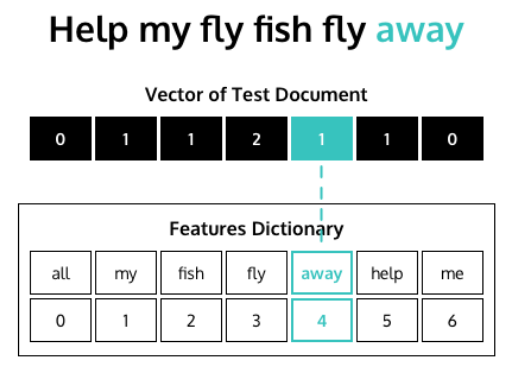

In [22]:
import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word): # ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
    return normalized

# ABOVE : is for the pre-processing part to tokenize + lemmatization 
# -------------------------------------------------------------------------------------------------------
# the code to understand is BELOW


def create_features_dictionary(documents):
    features_dictionary = {}
    merged = " ".join(documents)
    tokens = preprocess_text(merged)
    index = 0
    for token in tokens:
        if token not in features_dictionary:
            features_dictionary[token] = index
            index +=1
    return features_dictionary, tokens

training_documents = ["Five fantastic fish flew off to find faraway functions.", 
"Maybe find another five fantastic fish?", "Find my fish with a function please!"]
# tuple so we need to take back the first element of this thing here, that is a dict
print("- Features Dictionary:\n", create_features_dictionary(training_documents)[0]) 


def text_to_bow_vector(some_text, features_dictionary):
    bow_vector = [0] * len(features_dictionary)
    tokens = preprocess_text(some_text)
    for token in tokens:
        feature_index = features_dictionary[token]
        bow_vector[feature_index] += 1
    return bow_vector, tokens

features_dictionary = {'function': 8, 'please': 14, 'find': 6, 'five': 0, 'with': 12, 
                       'fantastic': 1, 'my': 11, 'another': 10, 'a': 13, 'maybe': 9, 
                       'to': 5, 'off': 4, 'faraway': 7, 'fish': 2, 'fly': 3}

text = "Another five fish find another faraway fish."
print("\n - BoW Vector:\n", text_to_bow_vector(text, features_dictionary)[0])

- Features Dictionary:
 {'five': 0, 'fantastic': 1, 'fish': 2, 'fly': 3, 'off': 4, 'to': 5, 'find': 6, 'faraway': 7, 'function': 8, 'maybe': 9, 'another': 10, 'my': 11, 'with': 12, 'a': 13, 'please': 14}

 - BoW Vector:
 [1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0]
